## Getting started

You can find this notebook (and data) on [GitHub](https://github.com/exorad/GCMtools/tree/main/doc/source/notebooks).
We demonstrate the use of `GCMTools` on a set of data of HD209458b simulations from [Schneider et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022arXiv220209183S/abstract).

import all needed packages

In [1]:
import matplotlib.pyplot as plt
from GCMtools import GCMT
import GCMtools.gcm_plotting as gcmp

This tutorial will showcase how to use the GCMT package to load and analyze `MITgcm` data (raw binary format).
Lets take a look at how easy it is to load data from a `MITgcm` run.

In [2]:
data = 'HD2_test/run'   # path to data
gcmt = GCMT(p_unit='bar', time_unit='day')  # create a GCMT object
gcmt.read_raw('MITgcm', data, iters="all", prefix=['T','U','V','W'], tag='HD2')

[INFO] Preparing to read from MITgcm data directory:HD2_test/run
       Iterations: 38016000, 41472000
time needed to build regridder: 0.8732438087463379
Regridder will use conservative method


We can do some additional post-processing, such as calculating global horizontal averages of the temperature

In [3]:
gcmt.add_horizontal_average('T', 'T_g', tag='HD2');

We can also retrieve an xarray dataset from the GCMT object, for further use.

In [4]:
ds = gcmt.get_models('HD2')
# ds = gcmt.models # note this is equal, since we only loaded one dataset

Check the content of the dataset:

In [ ]:
# ds

In [ ]:
# ds

### Plot data

We now demonstrate how to do simple plots of the data.
We start with an isobaric slice of the temperature.

Don't forget to checkout the [options for the plotting functions](https://gcmtools.readthedocs.io/en/latest/usage.html#plotting).

In [ ]:
gcmt.isobaric_slice(p=1e-2, lookup_method='nearest', var_key='T', wind_kwargs={'windstream':False, 'sample_one_in':2})

Note that gcmt wraps the plot functions defined in GCMtools.gcm_plotting. You achieve the same with:

In [ ]:
gcmp.isobaric_slice(ds, p=1e-2, lookup_method='nearest', var_key='T', wind_kwargs={'windstream':False, 'sample_one_in':2})

We can also do a zonal mean of the wind.

In [ ]:
gcmt.zonal_mean('U', contourf = True, levels =20)

Lets think about the temperature evolution of the horizontally averaged temperature profile.

In [ ]:
gcmt.time_evol('T_g')  # note that we only loaded two timesteps

### Advanced plotting with cartopy

Plots look a lot nicer, if we use cartopy. So lets do it.

In [ ]:
import cartopy.crs as ccrs
PROJECTION = ccrs.Robinson()

In [ ]:
time = -1
fig, axes = plt.subplots(2,2,subplot_kw={'projection':PROJECTION}, figsize=(12,8), constrained_layout=True)
for i,Z in enumerate([1e-3, 1e-1,1e-2,1]):
    axt = axes.flat[i]
    gcmt.isobaric_slice(var_key='T',
                        ax=axt, p=Z, time=time, lookup_method ='nearest',
                        wind_kwargs={'transform':ccrs.PlateCarree(),'windstream':True, 'arrowColor':'w','sample_one_in':2},
                        transform=ccrs.PlateCarree(), cmap=plt.get_cmap('inferno'),
                        contourf=True, levels=20,
                        cbar_kwargs={'pad':.005})

Using cartopy is very simple. Make sure to create an axes obeject with the keyword `projection` to set to a cartopy projection.
You then use the `transform` keyword during plotting to set the coordinate system, that the data is defined in (`ccrs.PlateCarree()`)

### Plot data

In [ ]:
gcmt.isobaric_slice(p=1e-2, lookup_method='nearest', var_key='T', wind_kwargs={'windstream':False, 'sample_one_in':2})

In [ ]:
gcmt.zonal_mean('U')

In [ ]:
time = -1
fig, axes = plt.subplots(2,2,subplot_kw={'projection':PROJECTION}, figsize=(12,8), constrained_layout=True)
for i,Z in enumerate([1e-3, 1e-1,1e-2,1]):
    axt = axes.flat[i]
    gcmt.isobaric_slice(var_key='T',
                        ax=axt, p=Z, time=time, lookup_method ='nearest',
                        wind_kwargs={'transform':ccrs.PlateCarree(),'windstream':True, 'arrowColor':'w','sample_one_in':2},
                        transform=ccrs.PlateCarree(), cmap=plt.get_cmap('inferno'),
                        contourf=True, levels=20,
                        cbar_kwargs={'pad':.005})

Using cartopy is very simple. Make sure to create an axes obeject with the keyword `projection` to set to a cartopy projection.
You then use the `transform` keyword during plotting to set the coordinate system, that the data is defined in (`ccrs.PlateCarree()`)

### Plot data

In [ ]:
gcmt.isobaric_slice(p=1e-2, lookup_method='nearest', var_key='T', wind_kwargs={'windstream':False, 'sample_one_in':2})

In [ ]:
gcmt.zonal_mean('U')

Using cartopy is very simple. Make sure to create an axes obeject with the keyword `projection` to set to a cartopy projection.
You then use the `transform` keyword during plotting to set the coordinate system, that the data is defined in (`ccrs.PlateCarree()`)

### Plot data

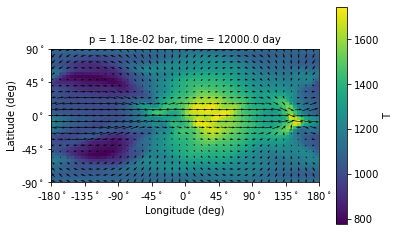

In [24]:
gcmt.isobaric_slice(p=1e-2, lookup_method='nearest', var_key='T', wind_kwargs={'windstream':False, 'sample_one_in':2})

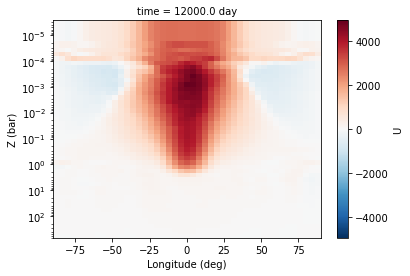

In [25]:
gcmt.zonal_mean('U')